In [ ]:
import os

import tensorflow as tf

dataset_url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
data_dir = tf.keras.utils.get_file("food-101", origin=dataset_url, untar=True)

food_dir = os.path.join(data_dir, "food-101", "images")

print("Dataset is ready. Image directory is at:")
print(food_dir)

In [ ]:
import os

home_dir = os.path.expanduser("~")
food_dir = os.path.join(
    home_dir, ".keras", "datasets", "food-101", "food-101", "images"
)


print("Path to images:", food_dir)
class_names = sorted(os.listdir(food_dir))

print(f"There are {len(class_names)} different food classes.")
print("Here are a few examples:", class_names[:5])

Path to images: /home/eduard/.keras/datasets/food-101/food-101/images
There are 101 different food classes.
Here are a few examples: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']


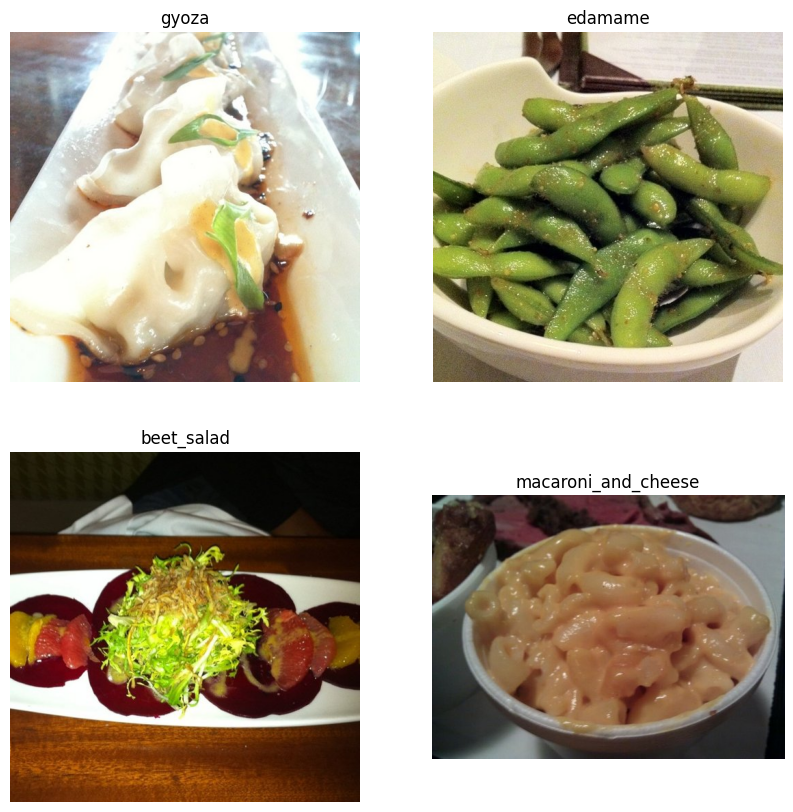

In [19]:
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def view_random_images(target_dir, num_images=4):
    """Picks a random class and a random image from that class to display."""
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Pick a random class
        food_class = random.choice(os.listdir(target_dir))
        class_path = os.path.join(target_dir, food_class)

        # Pick a random image
        random_image = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, random_image)

        # Plot the image
        plt.subplot(2, 2, i + 1)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(food_class)
        plt.axis("off")
    plt.show()


# Run the function
view_random_images(food_dir)

In [ ]:
import os

import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

home_dir = os.path.expanduser("~")
food_dir = os.path.join(
    home_dir, ".keras", "datasets", "food-101", "food-101", "images"
)


print("Creating the training dataset...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    food_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

print("\nCreating the validation dataset...")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    food_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

Creating the training dataset...
Found 101000 files belonging to 101 classes.
Using 80800 files for training.


2025-09-29 12:27:51.828935: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Creating the validation dataset...
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [ ]:
class_names = train_dataset.class_names
print("\nClass names (first 5):", class_names[:5])

for image_batch, labels_batch in train_dataset.take(1):
    print("\nShape of one image batch:", image_batch.shape)
    print("Shape of one labels batch:", labels_batch.shape)


Class names (first 5): ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

Shape of one image batch: (32, 224, 224, 3)
Shape of one labels batch: (32,)


2025-09-29 12:27:55.043101: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-09-29 12:27:55.168364: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


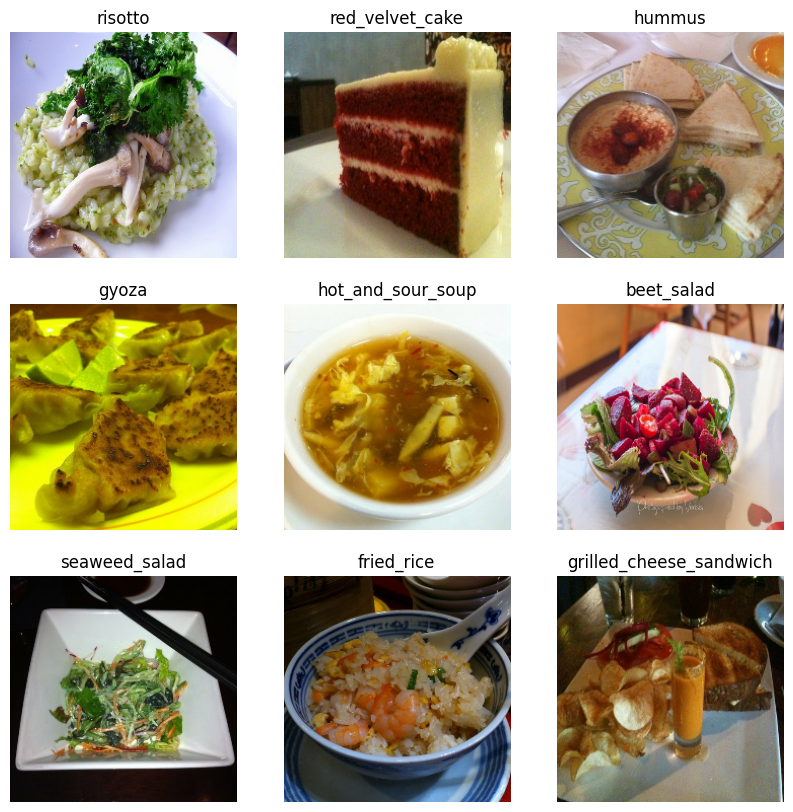

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("\nDatasets are now configured for performance.")


Datasets are now configured for performance.
